# Chapter 3 - A Tour of Machine Learning Classifiers Using Scikit-Learn

In [6]:
%load_ext watermark
%watermark -a "Othmane Rifki" -u -d -p numpy,pandas,matplotlib,scikit-learn

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Othmane Rifki

Last updated: 2021-04-01

numpy       : 1.20.1
pandas      : 1.2.3
matplotlib  : 3.3.4
scikit-learn: 0.24.1



In [7]:
from IPython.display import Image
%matplotlib inline

## First attempt with scikit-learn

Important methods:
* `datasets`: to get various datasets
* `model_selection`: to get `train_test_split`
* `preprocessing`: for feature scaling `StandardScaler`
* `linear_model`: for various linear learning algorithms 
* `metrics`: to evaluate model

### Load data

In [8]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


### Split data

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [10]:
print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y: [50 50 50]
Labels count in y_train: [35 35 35]
Labels count in y_test: [15 15 15]


### Feature scaling

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Train a perceptron

In [12]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [13]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


### Show metrics

In [14]:
# 1-manually
print(f'Accuracy: {(y_pred == y_test).sum()/len(y_test):.2%}')

Accuracy: 97.78%


In [15]:
# 2-built-in
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2%}')

Accuracy: 97.78%


In [16]:
# 3-fit+score
print(f'Accuracy: {ppn.score(X_test_std, y_test):.2%}')

Accuracy: 97.78%


### Plot 

In [17]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

<ipython-input-17-4cd5e22e52b7>:37: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


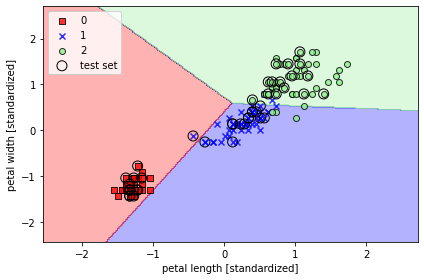

In [18]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('images/03_01.png', dpi=300)
plt.show()

## Playing with logistic regression

### odds and logits

In [19]:
# example of converting between probability and log-odds
from math import log
from math import exp
# define our probability of success
prob = 0.8
print('Probability %.1f' % prob)
# convert probability to odds
odds = prob / (1 - prob)
print('Odds %.1f' % odds)
# convert odds to log-odds
logodds = log(odds)
print('Log-Odds %.1f' % logodds)
# convert log-odds to a probability
prob = 1 / (1 + exp(-logodds))
print('Probability %.1f' % prob)

Probability 0.8
Odds 4.0
Log-Odds 1.4
Probability 0.8


In [20]:
# test of Bernoulli likelihood function

# likelihood function for Bernoulli distribution
def likelihood(y, yhat):
	return yhat * y + (1 - yhat) * (1 - y)

# test for y=1
y, yhat = 1, 0.9
print('y=%.1f, yhat=%.1f, likelihood: %.3f' % (y, yhat, likelihood(y, yhat)))
y, yhat = 1, 0.1
print('y=%.1f, yhat=%.1f, likelihood: %.3f' % (y, yhat, likelihood(y, yhat)))
# test for y=0
y, yhat = 0, 0.1
print('y=%.1f, yhat=%.1f, likelihood: %.3f' % (y, yhat, likelihood(y, yhat)))
y, yhat = 0, 0.9
print('y=%.1f, yhat=%.1f, likelihood: %.3f' % (y, yhat, likelihood(y, yhat)))

y=1.0, yhat=0.9, likelihood: 0.900
y=1.0, yhat=0.1, likelihood: 0.100
y=0.0, yhat=0.1, likelihood: 0.900
y=0.0, yhat=0.9, likelihood: 0.100


### Plot sigmoid function = logistic function

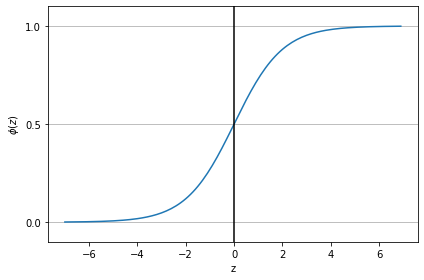

In [21]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('images/03_02.png', dpi=300)
plt.show()

### Learning the weights of the logistic cost function

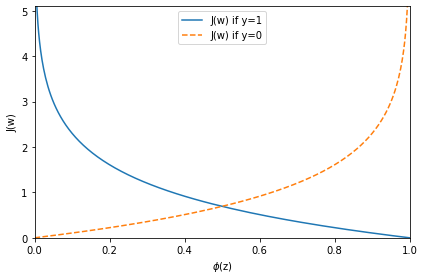

In [22]:
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('images/03_04.png', dpi=300)
plt.show()

### Logistic regression algorithm

In [23]:
import numpy as np

class LogisticRegressionGD(object):
    """
    Implementation of logistic regression using the gradient descent minimization algorithm
    """
    
    def __init__(self, eta=0.01, n_iter=10, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """Fit function to your data X with dimensions [number of examples, number of features] and y [number of examples]"""
        self.w_ = np.random.normal(0, 0.01, 1+X.shape[1])
        self.cost_ = []
        
        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            
            self.w_[1:] += self.eta * np.dot(X.T,errors)
            self.w_[0] += self.eta * np.sum(errors)
            
            cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1-output))))
            
            self.cost_.append(cost)
        
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

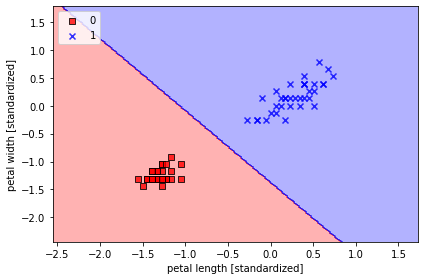

In [24]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_05.png', dpi=300)
plt.show()

### Training a logistic regression model with scikit-learn

<ipython-input-17-4cd5e22e52b7>:37: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


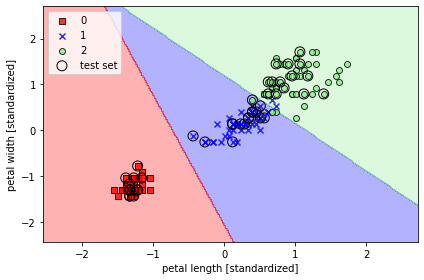

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()

### Add regularization to logistic regression

Note that scikit learn is different than the by-hand implementation: `coef_` and `intercept_` are equivalent to my definition of `w_`

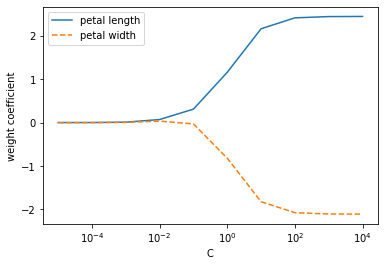

In [26]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1,
                            solver='lbfgs',
                            multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
#plt.savefig('images/03_08.png', dpi=300)
plt.show()

### Maximum margin classification with support vector machines

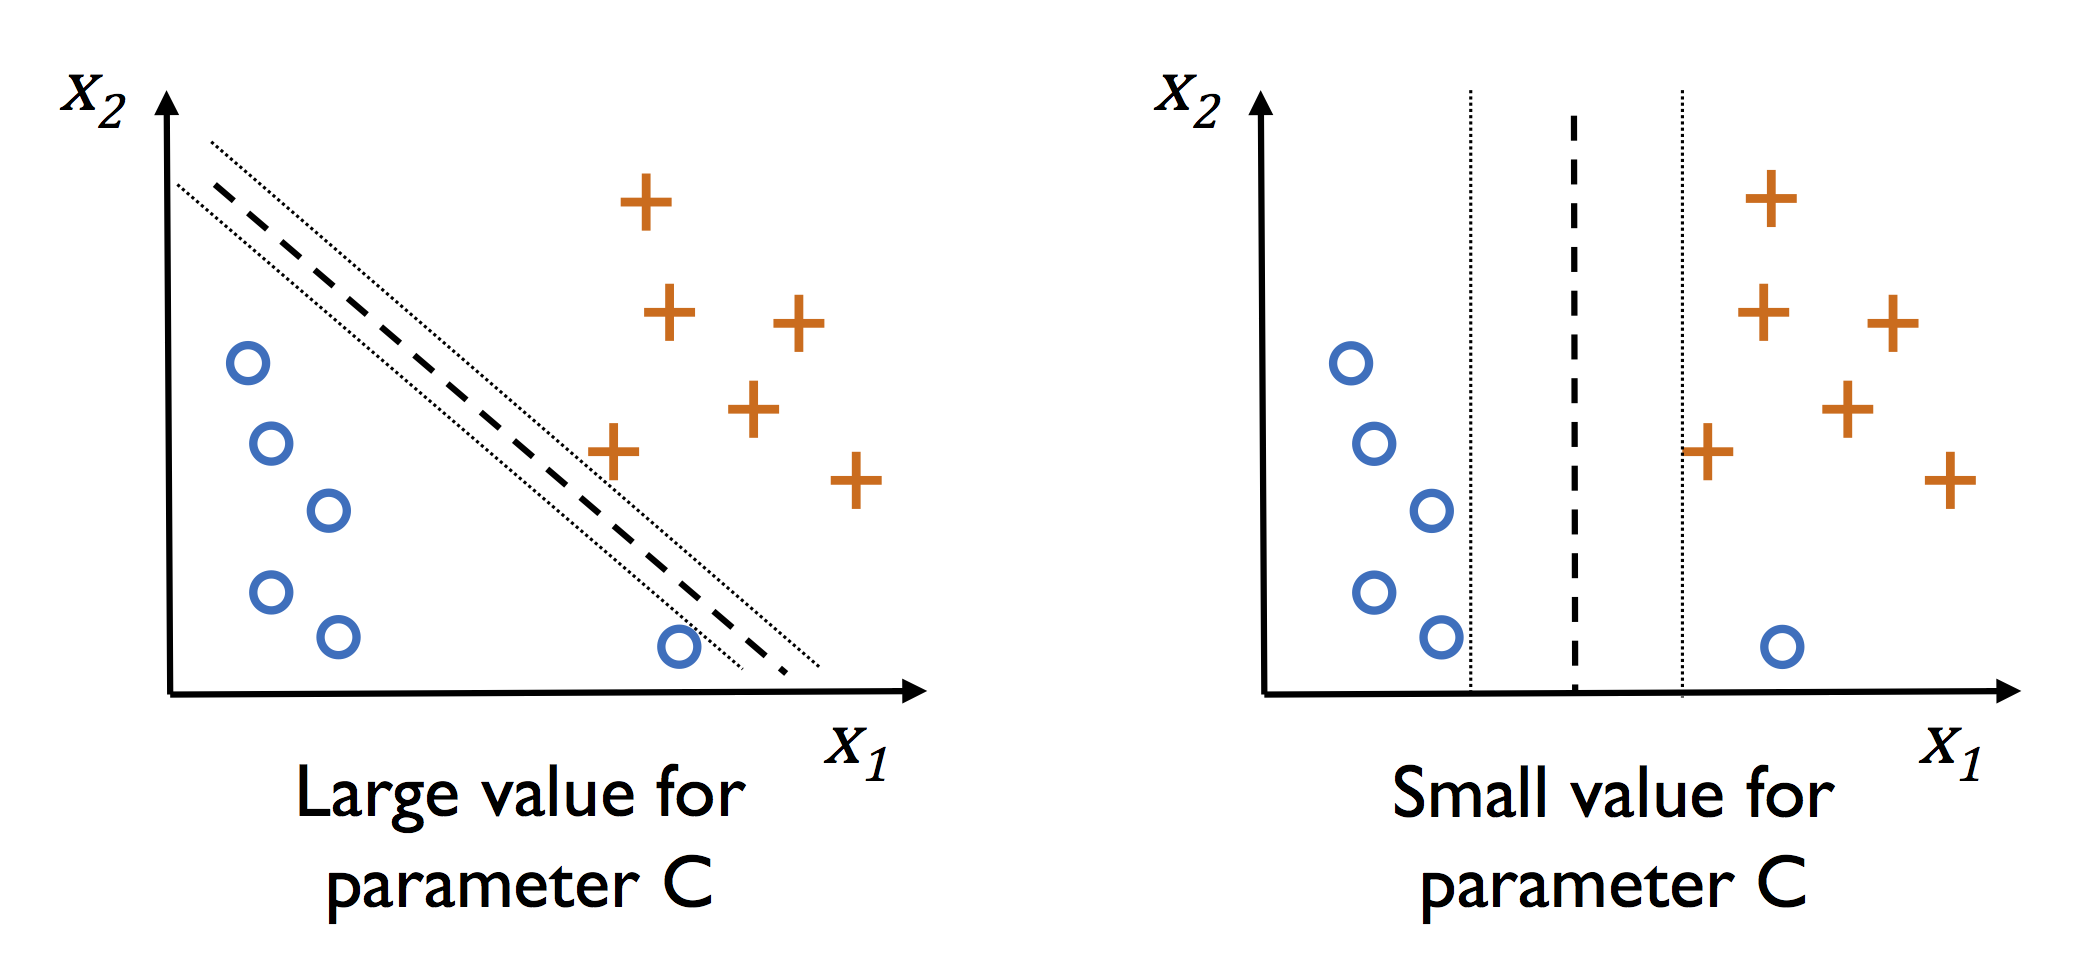

In [54]:
Image(filename='images/03_10.png', width=600) 

<ipython-input-17-4cd5e22e52b7>:37: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


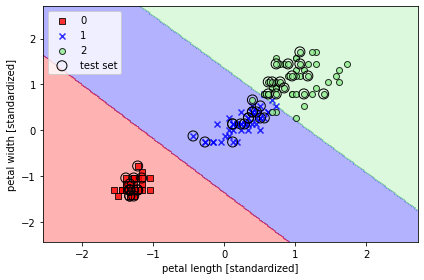

In [61]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=10**0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('images/03_11.png', dpi=300)
plt.show()